In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

### Camera Poses

In [81]:
fp1 = "plot_imgs/bear_cams.png"
fp2 = "plot_imgs/books_cams.png"

# Concatenate images
img1 = Image.open(fp1)
img2 = Image.open(fp2)
# To np
img1 = np.array(img1)
img2 = np.array(img2)
img1.shape, img2.shape

((1016, 1852, 3), (1016, 1852, 3))

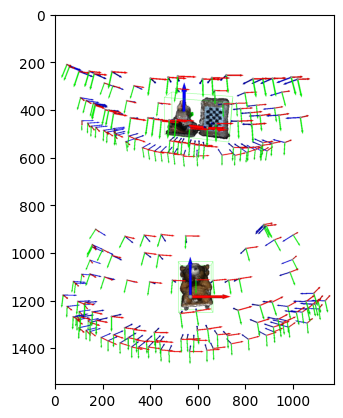

In [82]:
# Crop x and y
crop_x = 340
crop_y = 120

crop1 = img1[crop_y:-crop_y, crop_x:-crop_x]
crop2 = img2[crop_y:-crop_y, crop_x:-crop_x]

# Concatenate
img = np.concatenate([crop2, crop1], axis=0)

# To PIL
img = Image.fromarray(img)
img.save("plot_imgs/cams.png")

plt.imshow(img)

### Final Results

In [401]:
col_folder = "pointnerf/checkpoints/col_nerfsynth"
norm_folder = "pointnerf/checkpoints/nerfsynth"

books_norm = os.path.join(norm_folder, "books/test_250000/images")
books_col = os.path.join(col_folder, "books/test_250000/images")

bear_norm = os.path.join(norm_folder, "bear/test_200000/images")
bear_col = os.path.join(col_folder, "bear/test_200000/images")

# Print if they exist
os.path.exists(books_norm), os.path.exists(books_col), os.path.exists(bear_norm), os.path.exists(bear_col)

(True, True, True, True)

In [402]:
def get_images(col_folder, norm_folder, idxs):
    col_fps = sorted([fp for fp in os.listdir(col_folder) if "coarse" in fp])
    norm_fps = sorted([fp for fp in os.listdir(norm_folder) if "coarse" in fp])
    gt_fps = sorted([fp for fp in os.listdir(norm_folder) if "gt" in fp])
    print(len(col_fps), len(norm_fps), len(gt_fps))
    cols, norms, gts = [], [], []
    for idx in idxs:
        col_fp = os.path.join(col_folder, col_fps[idx])
        norm_fp = os.path.join(norm_folder, norm_fps[idx])
        gt_fp = os.path.join(norm_folder, gt_fps[idx])

        cols.append(np.array(Image.open(col_fp)))
        norms.append(np.array(Image.open(norm_fp)))
        gts.append(np.array(Image.open(gt_fp)))
    
    return cols, norms, gts

33 33 33


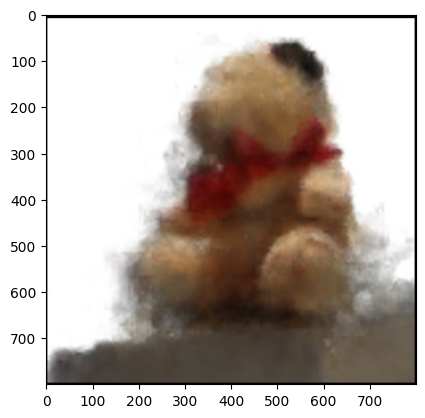

In [403]:
# Get tested book images
idxs = [19, 32, 29, 23, 12, 31, 26, 17]
book_cols, book_norms, book_gts = get_images(books_col, books_norm, idxs)

book_zoom_idx = 4
book_zoom = [book_cols[book_zoom_idx], book_norms[book_zoom_idx], book_gts[book_zoom_idx]]
h, w = book_zoom[0].shape[:2]
zoom_x1, zoom_x2 = 130, 270
zoom_y1, zoom_y2 = 230, 370

# Crop to zoom and resize up
book_zoom = [img[zoom_y1:zoom_y2, zoom_x1:zoom_x2] for img in book_zoom]
book_zoom = [Image.fromarray(img) for img in book_zoom]
book_zoom = [img.resize((w, h)) for img in book_zoom]
book_zoom = [np.array(img) for img in book_zoom]

# Set border to black
border_width = 3
for i in range(3):
    book_zoom[i][:border_width * 3, :] = 0
    book_zoom[i][-border_width:, :] = 0
    book_zoom[i][:, :border_width] = 0
    book_zoom[i][:, -border_width:] = 0

plt.imshow(book_zoom[0])

In [404]:
# Append to rendered images
book_cols = np.concatenate(book_cols + [book_zoom[0]], axis=1)
book_norms = np.concatenate(book_norms + [book_zoom[1]], axis=1)
book_gts = np.concatenate(book_gts + [book_zoom[2]], axis=1)
book_cols.shape, book_norms.shape, book_gts.shape

((800, 7200, 3), (800, 7200, 3), (800, 7200, 3))

53 53 53


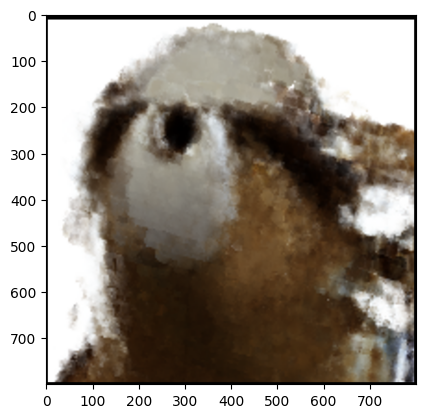

In [405]:
# Get tested bear images
idxs = [16, 9, 45, 35, 3, 30, 0, 7]
bear_cols, bear_norms, bear_gts = get_images(bear_col, bear_norm, idxs)

bear_zoom_idx = 4
bear_zoom = [bear_cols[bear_zoom_idx], bear_norms[bear_zoom_idx], bear_gts[bear_zoom_idx]]
h, w = bear_zoom[0].shape[:2]
zoom_x1, zoom_x2 = 340, 540
zoom_y1, zoom_y2 = 40, 240

# Crop to zoom and resize up
bear_zoom = [img[zoom_y1:zoom_y2, zoom_x1:zoom_x2] for img in bear_zoom]
bear_zoom = [Image.fromarray(img) for img in bear_zoom]
bear_zoom = [img.resize((w, h)) for img in bear_zoom]
bear_zoom = [np.array(img) for img in bear_zoom]

# Set border to black
border_width = 4
for i in range(3):
    bear_zoom[i][:border_width * 3, :] = 0
    bear_zoom[i][-border_width:, :] = 0
    bear_zoom[i][:, :border_width] = 0
    bear_zoom[i][:, -border_width:] = 0

plt.imshow(bear_zoom[0])

In [406]:
# Append to rendered images
bear_cols = np.concatenate(bear_cols + [bear_zoom[0]], axis=1)
bear_norms = np.concatenate(bear_norms + [bear_zoom[1]], axis=1)
bear_gts = np.concatenate(bear_gts + [bear_zoom[2]], axis=1)
bear_cols.shape, bear_norms.shape, bear_gts.shape

((800, 7200, 3), (800, 7200, 3), (800, 7200, 3))

In [407]:
def plot(gts, cols, norms, save_fp):
    # Plot in rows, hide axis, but show ylabels
    fig, ax = plt.subplots(3, 1, figsize=(20, 10))
    ax[0].imshow(gts)
    ax[1].imshow(cols)
    ax[2].imshow(norms)

    for i in range (3):
        ax[i].get_xaxis().set_ticks([])
        ax[i].get_yaxis().set_ticks([])
        ax[i].spines['bottom'].set_color('white')
        ax[i].spines['top'].set_color('white')
        ax[i].spines['left'].set_color('white')
        ax[i].spines['right'].set_color('white')

    fontsize = 15
    ax[0].set_ylabel("Ground Truth", fontsize=fontsize)
    ax[1].set_ylabel("Depth Sensor Pointcloud", fontsize=fontsize)
    ax[2].set_ylabel("MVSNet Pointcloud", fontsize=fontsize)

    # plt.tight_layout()
    plt.savefig(save_fp, bbox_inches='tight', pad_inches=0, dpi=500)
    plt.show()

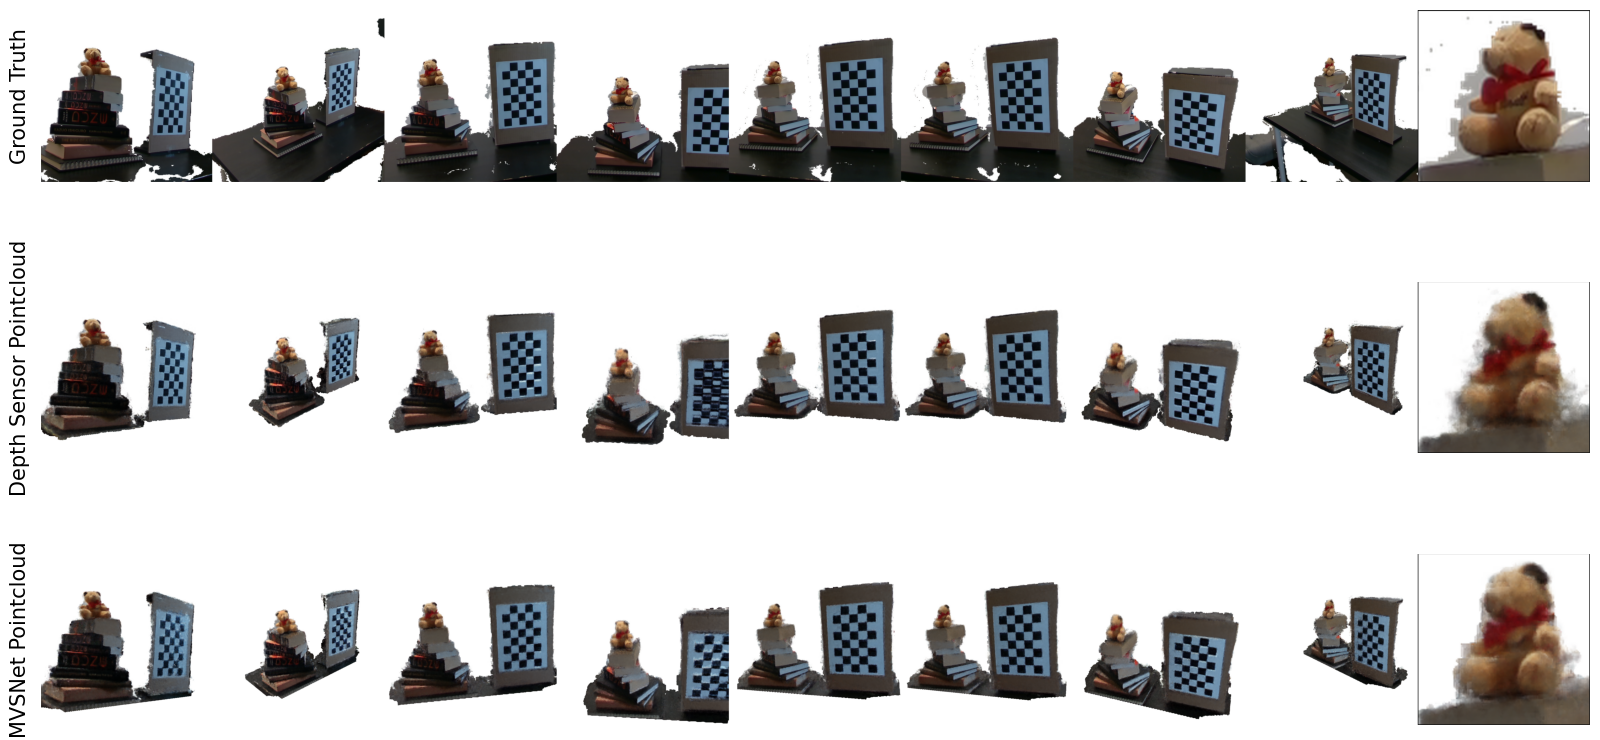

In [408]:
plot(book_gts, book_cols, book_norms, "plot_imgs/books.png")

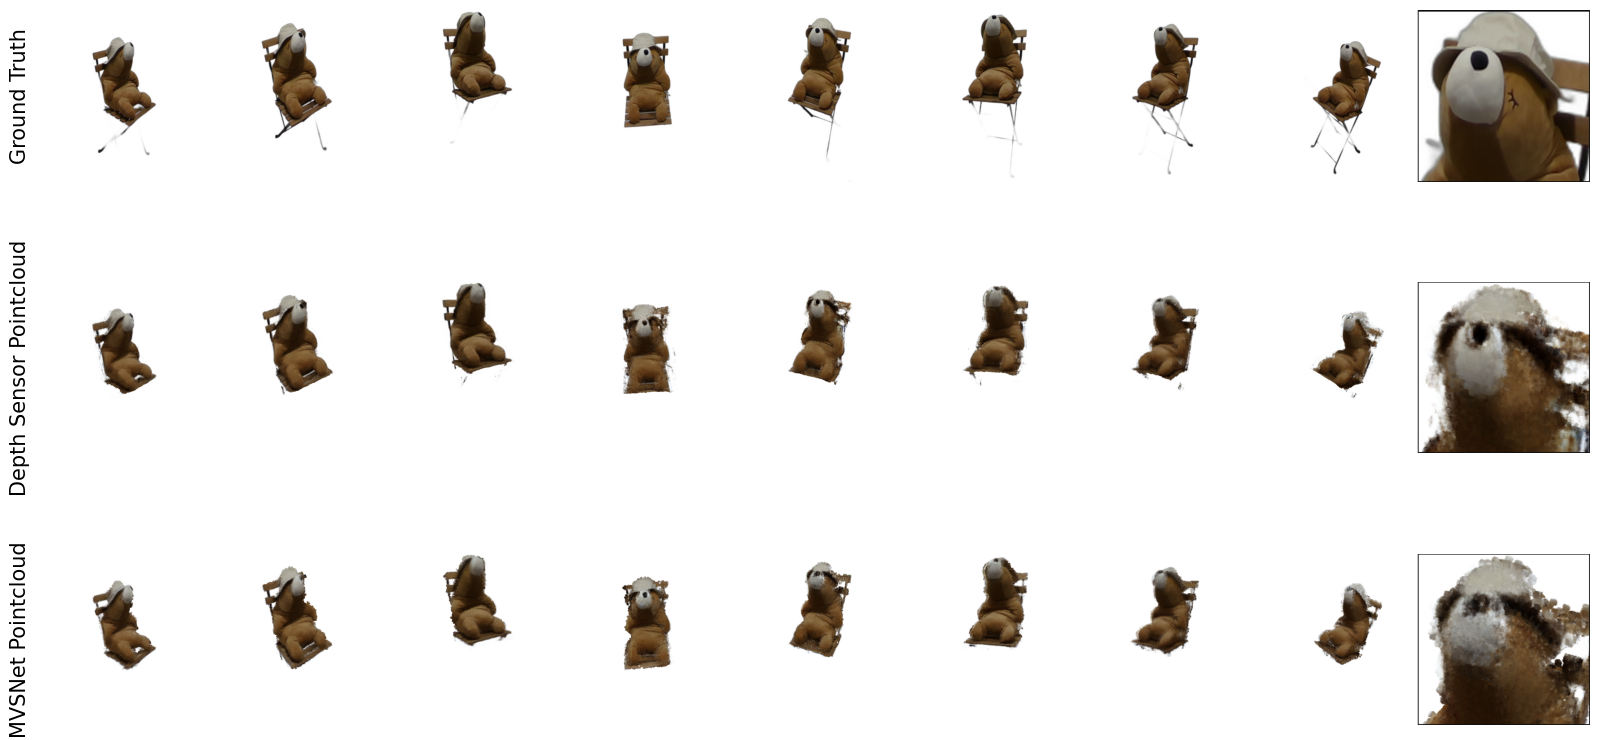

In [409]:
plot(bear_gts, bear_cols, bear_norms, "plot_imgs/bear.png")

### Metrics during Training 

In [9]:
col_folder = "pointnerf/checkpoints/col_nerfsynth"
norm_folder = "pointnerf/checkpoints/nerfsynth"

books_norm = os.path.join(norm_folder, "books")
books_col = os.path.join(col_folder, "books")

bear_norm = os.path.join(norm_folder, "bear")
bear_col = os.path.join(col_folder, "bear")
bear_fixed = os.path.join(col_folder, "bear_fixed")

# Print if they exist
os.path.exists(books_norm), os.path.exists(books_col), os.path.exists(bear_norm), os.path.exists(bear_col), os.path.exists(bear_fixed)

(True, True, True, True, True)

In [14]:
import glob
def get_metrics(folder, idx_clip=190000):
    metrics = ["psnr", "ssim", "lpips"]
    metric_data = []
    for metric in metrics:
        fps = glob.glob(os.path.join(folder, "**", f"{metric}.txt"), recursive=True)
        lst = []
        for fp in fps:
            test_num = int(fp.split("/")[-3].split("_")[1])
            if test_num > idx_clip:
                continue
            with open(fp) as f:
                avg = np.mean([float(line.strip()) for line in f])
            lst.append((test_num, avg))
        lst = sorted(lst, key=lambda x: x[0])
        metric_data.append(lst)
    return metric_data

In [15]:
book_norm_metrics = get_metrics(books_norm)
book_col_metrics = get_metrics(books_col)

bear_norm_metrics = get_metrics(bear_norm)
bear_col_metrics = get_metrics(bear_col)
bear_fixed_metrics = get_metrics(bear_fixed)

# Only keep records with matching indices
def filter_metrics(m1, m2):
    common_idxs = set([x[0] for x in m1]).intersection(
        set([x[0] for x in m2]))
    m1 = [x for x in m1 if x[0] in common_idxs]
    m2 = [x for x in m2 if x[0] in common_idxs]
    m1 = sorted(m1, key=lambda x: x[0])
    m2 = sorted(m2, key=lambda x: x[0])
    return m1, m2

for i in range(3):
    book_norm_metrics[i], book_col_metrics[i] = filter_metrics(book_norm_metrics[i], book_col_metrics[i])
    bear_norm_metrics[i], bear_col_metrics[i] = filter_metrics(bear_norm_metrics[i], bear_col_metrics[i])

# List length
len(book_norm_metrics[0]), len(book_col_metrics[0]), len(bear_norm_metrics[0]), len(bear_col_metrics[0]), len(bear_fixed_metrics[0])

(20, 20, 24, 24, 24)

In [16]:
# Plot metrics for books and bear
def plot_separate(metric_name, save_fp):
    fig, ax = plt.subplots(2, 1, figsize=(8, 12))
    metric_idx = {"psnr": 0, "ssim": 1, "lpips": 2}[metric_name]
    ax[0].set_title("Books Scene", fontsize=15)
    ax[0].plot([x[0] for x in book_norm_metrics[metric_idx]],
        [x[1] for x in book_norm_metrics[metric_idx]], label="MVSNet")
    ax[0].plot([x[0] for x in book_col_metrics[metric_idx]],
        [x[1] for x in book_col_metrics[metric_idx]], label="Depth Sensor")
    ax[0].legend()
    ax[0].set_xlabel("Training Iterations")
    ax[0].set_ylabel(metric_name)

    ax[1].set_title("Bear Scene", fontsize=15)
    ax[1].plot([x[0] for x in bear_norm_metrics[metric_idx]],
        [x[1] for x in bear_norm_metrics[metric_idx]], label="MVSNet")
    ax[1].plot([x[0] for x in bear_col_metrics[metric_idx]],    
        [x[1] for x in bear_col_metrics[metric_idx]], label="Depth Sensor")
    ax[1].plot([x[0] for x in bear_fixed_metrics[metric_idx]],
        [x[1] for x in bear_fixed_metrics[metric_idx]], label="Depth Sensor (Fixed Pointcloud)")
    ax[1].legend()
    ax[1].set_xlabel("Training Iterations")
    ax[1].set_ylabel(metric_name)

    plt.savefig(save_fp, bbox_inches='tight', pad_inches=0.2)
    plt.show()

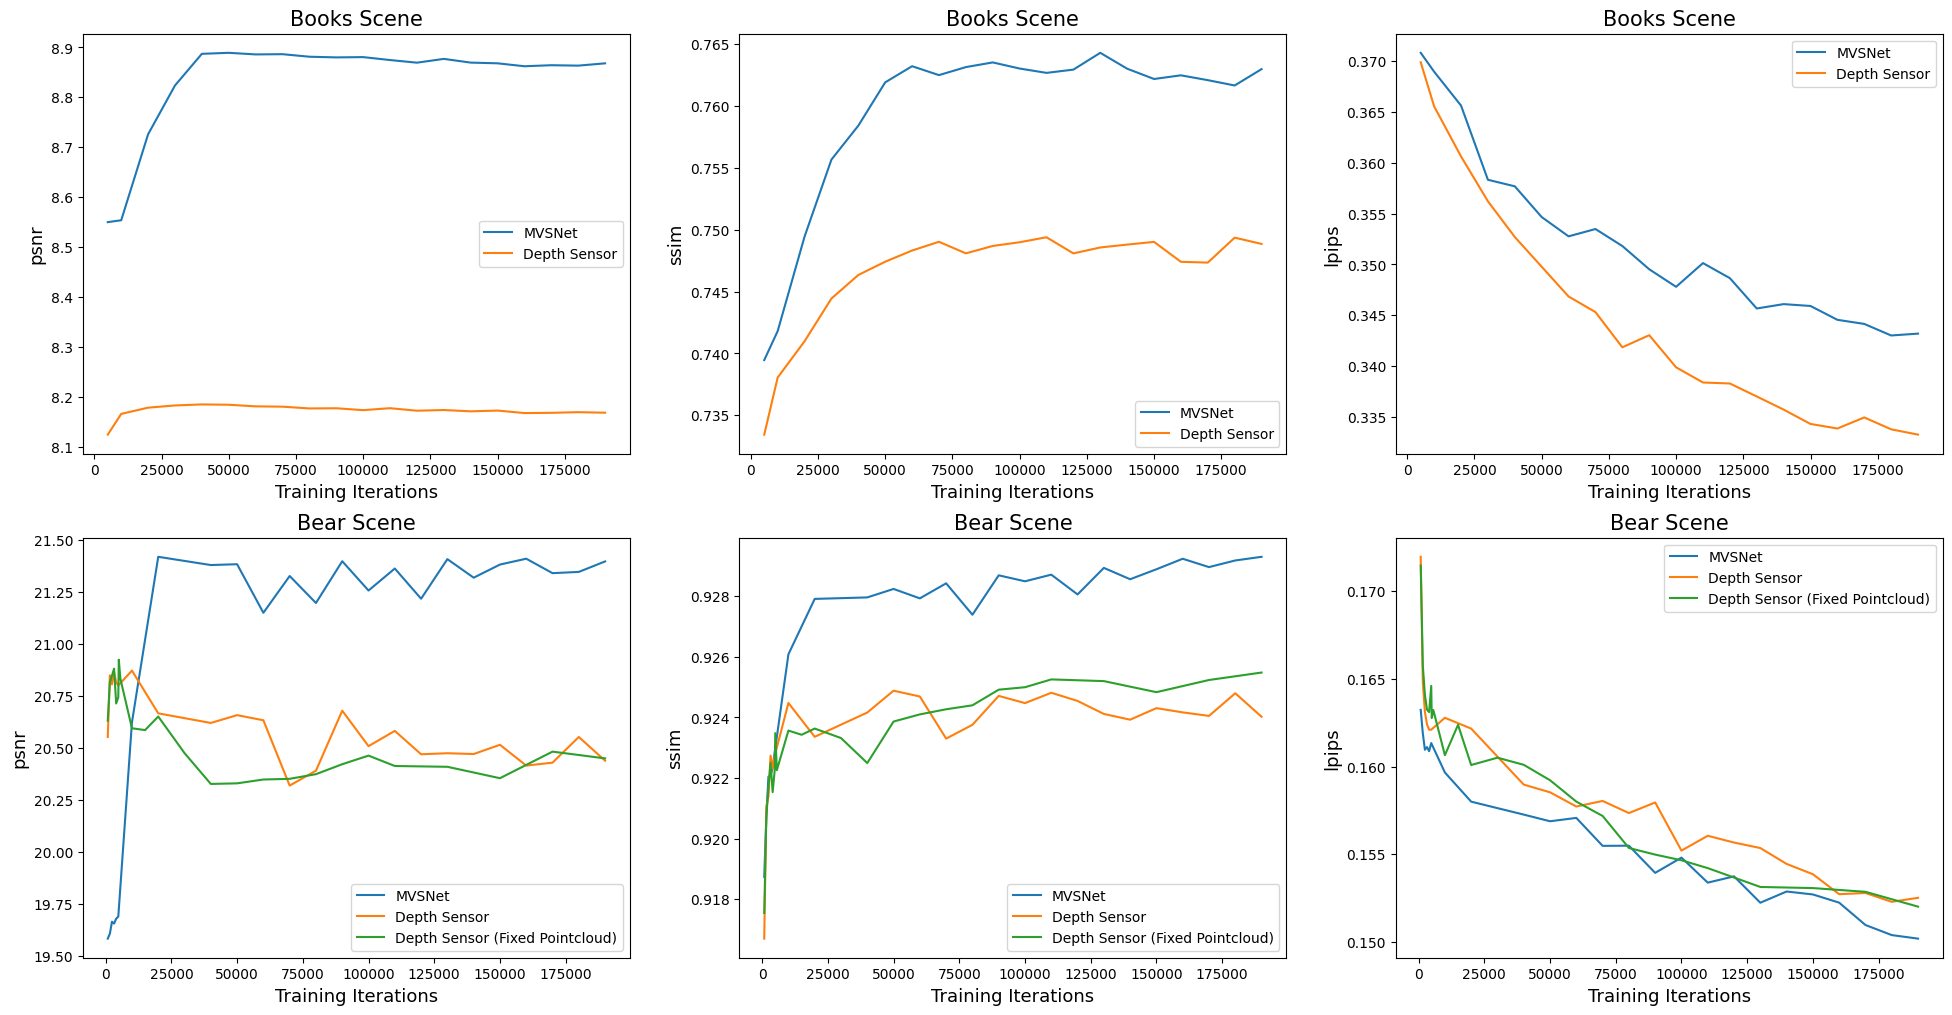

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(24, 12))

for j, metric_name in enumerate(["psnr", "ssim", "lpips"]):
    metric_idx = j
    title_fs = 15
    axes_fs = 13
    ax[0][j].set_title("Books Scene", fontsize=title_fs)
    ax[0][j].plot([x[0] for x in book_norm_metrics[metric_idx]],
        [x[1] for x in book_norm_metrics[metric_idx]], label="MVSNet")
    ax[0][j].plot([x[0] for x in book_col_metrics[metric_idx]],
        [x[1] for x in book_col_metrics[metric_idx]], label="Depth Sensor")
    ax[0][j].legend()
    ax[0][j].set_xlabel("Training Iterations", fontsize=axes_fs)
    ax[0][j].set_ylabel(metric_name, fontsize=axes_fs)

    ax[1][j].set_title("Bear Scene", fontsize=title_fs)
    ax[1][j].plot([x[0] for x in bear_norm_metrics[metric_idx]],
        [x[1] for x in bear_norm_metrics[metric_idx]], label="MVSNet")
    ax[1][j].plot([x[0] for x in bear_col_metrics[metric_idx]],    
        [x[1] for x in bear_col_metrics[metric_idx]], label="Depth Sensor")
    ax[1][j].plot([x[0] for x in bear_fixed_metrics[metric_idx]],
        [x[1] for x in bear_fixed_metrics[metric_idx]], label="Depth Sensor (Fixed Pointcloud)")
    ax[1][j].legend()
    ax[1][j].set_xlabel("Training Iterations", fontsize=axes_fs)
    ax[1][j].set_ylabel(metric_name, fontsize=axes_fs)


plt.savefig("plot_imgs/loss.png", bbox_inches='tight', pad_inches=0.2)
plt.show()

### Remove background samples

In [427]:
from rembg import remove

In [428]:
books_imgs = np.load("data/books_2/npys/color.npy")
bear_imgs = np.load("data/bear/npys/color.npy")
books_imgs.shape, bear_imgs.shape

((162, 480, 640, 3), (211, 480, 640, 3))

In [429]:
# Random sample 8 images from each scene
np.random.seed(5)
books_sample = np.random.choice(books_imgs.shape[0], 8, replace=False)
bear_sample = np.random.choice(bear_imgs.shape[0], 8, replace=False)

# Remove background from images
books_sample = [remove(books_imgs[i]) for i in books_sample]
bear_sample = [remove(bear_imgs[i]) for i in bear_sample]

In [430]:
sample = np.concatenate([
    np.concatenate(books_sample[:4], axis=1),
    np.concatenate(books_sample[4:], axis=1),
    np.concatenate(bear_sample[:4], axis=1),
    np.concatenate(bear_sample[4:], axis=1),
], axis=0)
sample.shape

(1920, 2560, 4)

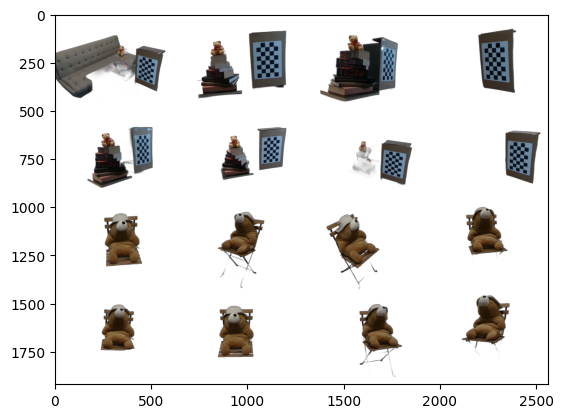

In [431]:
plt.imshow(sample)

In [432]:
# Sample to PIL and save
sample = Image.fromarray(sample)
sample.save("plot_imgs/sample.png")